![Image](https://miro.medium.com/max/1400/1*xt_TlsuG3FtSy22WPrqmNg.png)

## If you have a account on Spotify for Developer. Please go through the below link

[Spotify for Developer](https://developer.spotify.com/dashboard/login)

In [2]:
SPOTIFY_CLIENT_ID = ''  # Your Spotify Client ID
SPOTIFY_CLIENT_SECERET = ''  # Your Spotify Client Seceret ID

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import cred
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import json
scope = "user-private-read"

cliend_cre = SpotifyClientCredentials(SPOTIFY_CLIENT_ID,SPOTIFY_CLIENT_SECERET)
sp = spotipy.Spotify(client_credentials_manager=cliend_cre)

playlist_id = ""  # Playlist ID

res = sp.playlist(playlist_id)


In [5]:
ids=[]

for item in res['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # Popularity of Song
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 min = 60 sec = 60 × 1000 millisec = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)

In [6]:
features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.534,0.481,0,-9.016,0,0.0412,0.6970,0.000000,0.1420,0.293,124.914,audio_features,5O932cZmzOZGOGZz9RHx20,spotify:track:5O932cZmzOZGOGZz9RHx20,https://api.spotify.com/v1/tracks/5O932cZmzOZG...,https://api.spotify.com/v1/audio-analysis/5O93...,4.671367,4
1,0.562,0.519,3,-8.744,1,0.0326,0.5570,0.000268,0.1720,0.415,122.925,audio_features,2FCXQHugkoHE1K3tiDu8pu,spotify:track:2FCXQHugkoHE1K3tiDu8pu,https://api.spotify.com/v1/tracks/2FCXQHugkoHE...,https://api.spotify.com/v1/audio-analysis/2FCX...,5.684250,4
2,0.483,0.468,8,-7.642,1,0.0341,0.7850,0.000000,0.1520,0.319,135.864,audio_features,1smFN2CLqGROu0J0UyvDfL,spotify:track:1smFN2CLqGROu0J0UyvDfL,https://api.spotify.com/v1/tracks/1smFN2CLqGRO...,https://api.spotify.com/v1/audio-analysis/1smF...,4.132350,4
3,0.695,0.729,6,-6.274,0,0.0322,0.0738,0.000182,0.5330,0.872,118.028,audio_features,1Ef0TmgS1QrVO6tKHrMMmH,spotify:track:1Ef0TmgS1QrVO6tKHrMMmH,https://api.spotify.com/v1/tracks/1Ef0TmgS1QrV...,https://api.spotify.com/v1/audio-analysis/1Ef0...,5.048917,4
4,0.427,0.396,11,-7.556,1,0.0366,0.7360,0.000000,0.1100,0.306,70.368,audio_features,2Fv2injs4qAm8mJBGaxVKU,spotify:track:2Fv2injs4qAm8mJBGaxVKU,https://api.spotify.com/v1/tracks/2Fv2injs4qAm...,https://api.spotify.com/v1/audio-analysis/2Fv2...,4.746333,4
5,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,audio_features,5PjdY0CKGZdEuoNab3yDmX,spotify:track:5PjdY0CKGZdEuoNab3yDmX,https://api.spotify.com/v1/tracks/5PjdY0CKGZdE...,https://api.spotify.com/v1/audio-analysis/5Pjd...,2.363433,4
6,0.601,0.741,2,-5.569,1,0.0478,0.1850,0.000029,0.4150,0.441,153.960,audio_features,6I3mqTwhRpn34SLVafSH7G,spotify:track:6I3mqTwhRpn34SLVafSH7G,https://api.spotify.com/v1/tracks/6I3mqTwhRpn3...,https://api.spotify.com/v1/audio-analysis/6I3m...,2.553167,4
7,0.597,0.450,8,-6.658,1,0.0418,0.2230,0.000000,0.3820,0.537,178.765,audio_features,4HBZA5flZLE435QTztThqH,spotify:track:4HBZA5flZLE435QTztThqH,https://api.spotify.com/v1/tracks/4HBZA5flZLE4...,https://api.spotify.com/v1/audio-analysis/4HBZ...,3.808033,3
8,0.609,0.378,4,-9.828,1,0.4380,0.8350,0.000000,0.2800,0.515,100.418,audio_features,50kpGaPAhYJ3sGmk6vplg0,spotify:track:50kpGaPAhYJ3sGmk6vplg0,https://api.spotify.com/v1/tracks/50kpGaPAhYJ3...,https://api.spotify.com/v1/audio-analysis/50kp...,3.895333,4
9,0.654,0.630,10,-4.644,1,0.0259,0.1490,0.000000,0.1110,0.430,89.991,audio_features,4j5ffIFh7bFT7GZciP1TCy,spotify:track:4j5ffIFh7bFT7GZciP1TCy,https://api.spotify.com/v1/tracks/4j5ffIFh7bFT...,https://api.spotify.com/v1/audio-analysis/4j5f...,2.794883,4


In [7]:
final_df.head()

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,5O932cZmzOZGOGZz9RHx20,Chhichhore,Khairiyat,"Pritam, Arijit Singh",False,75,0.534,0.481,0,-9.016,...,0.000000,0.142,0.293,124.914,audio_features,spotify:track:5O932cZmzOZGOGZz9RHx20,https://api.spotify.com/v1/tracks/5O932cZmzOZG...,https://api.spotify.com/v1/audio-analysis/5O93...,4.671367,4
1,2FCXQHugkoHE1K3tiDu8pu,Love Forever With Arijit Singh,"Agar Tum Saath Ho (From ""Tamasha"")","Alka Yagnik, Arijit Singh",False,71,0.562,0.519,3,-8.744,...,0.000268,0.172,0.415,122.925,audio_features,spotify:track:2FCXQHugkoHE1K3tiDu8pu,https://api.spotify.com/v1/tracks/2FCXQHugkoHE...,https://api.spotify.com/v1/audio-analysis/2FCX...,5.684250,4
2,1smFN2CLqGROu0J0UyvDfL,Love Aaj Kal (Original Motion Picture Soundtrack),Shayad,"Pritam, Arijit Singh",False,73,0.483,0.468,8,-7.642,...,0.000000,0.152,0.319,135.864,audio_features,spotify:track:1smFN2CLqGROu0J0UyvDfL,https://api.spotify.com/v1/tracks/1smFN2CLqGRO...,https://api.spotify.com/v1/audio-analysis/1smF...,4.132350,4
3,1Ef0TmgS1QrVO6tKHrMMmH,YRF Top 10 - Nightout Sounds,"Ghungroo (From ""War"")","Vishal-Shekhar, Arijit Singh, Shilpa Rao, Kumaar",False,58,0.695,0.729,6,-6.274,...,0.000182,0.533,0.872,118.028,audio_features,spotify:track:1Ef0TmgS1QrVO6tKHrMMmH,https://api.spotify.com/v1/tracks/1Ef0TmgS1QrV...,https://api.spotify.com/v1/audio-analysis/1Ef0...,5.048917,4
4,2Fv2injs4qAm8mJBGaxVKU,"Tujhe Kitna Chahne Lage (From ""Kabir Singh"")","Tujhe Kitna Chahne Lage (From ""Kabir Singh"")","Arijit Singh, Mithoon",False,72,0.427,0.396,11,-7.556,...,0.000000,0.110,0.306,70.368,audio_features,spotify:track:2Fv2injs4qAm8mJBGaxVKU,https://api.spotify.com/v1/tracks/2Fv2injs4qAm...,https://api.spotify.com/v1/audio-analysis/2Fv2...,4.746333,4


### Check the Attributes in the features_df DataFrame

In [71]:
features_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

### Check the Attributes in the final_df DataFrame

In [8]:
final_df.columns

Index(['id', 'album', 'name', 'artist', 'explicit', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

### Now making a final DataFrame for analysing your music taste in your playlist

In [9]:
music = features_df[['danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness','valence', 'tempo','duration_ms']]

In [10]:
music.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.534,0.481,-9.016,0.0412,0.6970,0.000000,0.142,0.293,124.914,4.671367
1,0.562,0.519,-8.744,0.0326,0.5570,0.000268,0.172,0.415,122.925,5.684250
2,0.483,0.468,-7.642,0.0341,0.7850,0.000000,0.152,0.319,135.864,4.132350
3,0.695,0.729,-6.274,0.0322,0.0738,0.000182,0.533,0.872,118.028,5.048917
4,0.427,0.396,-7.556,0.0366,0.7360,0.000000,0.110,0.306,70.368,4.746333


In [11]:
music.iloc[0]

danceability          0.534000
energy                0.481000
loudness             -9.016000
speechiness           0.041200
acousticness          0.697000
instrumentalness      0.000000
liveness              0.142000
valence               0.293000
tempo               124.914000
duration_ms           4.671367
Name: 0, dtype: float64

### As you can see from the above data 1st row of music values are varing from -9.xx to 124.xx
### For making this data to come in range of 0 to 1 we will use `MinMaxScaler` from `sklearn`

In [12]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
music.loc[:]=min_max_scaler.fit_transform(music.loc[:])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


### Observe the music dataframe

In [13]:
music.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.281579,0.294521,0.188757,0.043394,0.743706,0.000000,0.203017,0.177557,0.503206,0.694990
1,0.355263,0.359589,0.223827,0.022662,0.585638,0.577586,0.264166,0.350852,0.484857,1.000000
2,0.147368,0.272260,0.365910,0.026278,0.843062,0.000000,0.223400,0.214489,0.604223,0.532675
3,0.705263,0.719178,0.542290,0.021697,0.040081,0.392241,1.000000,1.000000,0.439680,0.808682
4,0.000000,0.148973,0.376998,0.032305,0.787739,0.000000,0.137790,0.196023,0.000000,0.717564


### Lets have some visualization using `Matplotlib` so you can also take a look in your playlist how it look like

In [14]:
import matplotlib.pyplot as plt

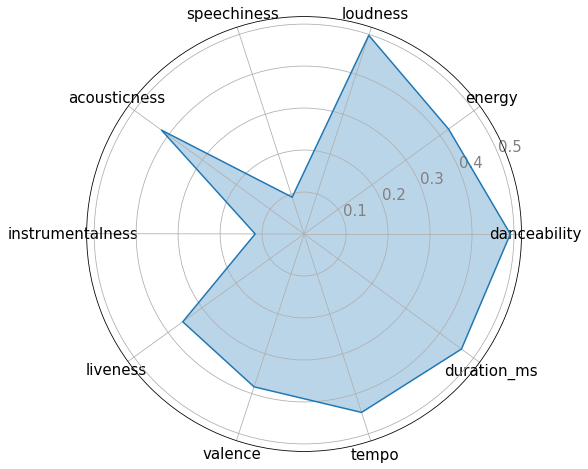

In [15]:
fig=plt.figure(figsize=(12,8))
pi = 3.14
categories=list(music.columns)
N=len(categories)

value=list(music.mean())

value+=value[:1]

angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

### From the above plot you can see that my playlist makes you dance with it's loudness ;)